In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from pydataset import data
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn.cluster import dbscan

### 1. Use the iris dataset.

    - Perform clustering with sepal length, sepal width, and petal length.
    - Use a k of 4.
    - Create a 3d visualization that shows your clusters along with the features specified above?
    - Is 4 the optimal number? Try different values of k and visualize your results.

In [2]:
# Bring in the iris data set

In [3]:
df_iris = data('iris')

In [4]:
df_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
# change the columns to be easier to read

In [6]:
df_iris.columns = [c.lower().replace('.', '_') for c in df_iris]
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [7]:
# pick the columns I want to use in the clustering model

In [8]:
x = df_iris[['sepal_length', 'sepal_width', 'petal_length']]

Text(0, 0.5, 'Inertia')

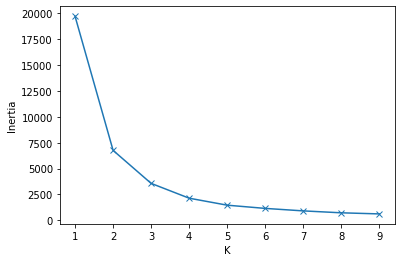

In [59]:
%matplotlib inline

k_values = []
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(x)
    inertias.append(kmeans.inertia_)
    k_values.append(k)
    
plt.plot(k_values, inertias, marker='x')
plt.xlabel('K')
plt.ylabel('Inertia')

In [10]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
kmeans.predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 2, 3, 2, 2, 0, 2, 2, 2,
       3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3], dtype=int32)

In [11]:
# These numbers are the center point for each cluster.

In [12]:
print(kmeans.cluster_centers_)

[[5.53214286 2.63571429 3.96071429]
 [5.006      3.428      1.462     ]
 [7.12272727 3.11363636 6.03181818]
 [6.292      2.898      4.94      ]]


In [13]:
# This array contains the predicted cluster for each number. (Same as kmeans.predict(x))

In [14]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 2, 3, 2, 2, 0, 2, 2, 2,
       3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3], dtype=int32)

In [15]:
# This number is the sum of squared errors from each data point to its associated cluster.

In [16]:
print(kmeans.inertia_)

49.43781558441559


In [17]:
# Creating a new dataframe that will show the center points of each cluster for each column.

In [18]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=x.columns)
centers

,sepal_length,sepal_width,petal_length
0,5.532143,2.635714,3.960714
1,5.006000,3.428000,1.462000
2,7.122727,3.113636,6.031818
3,6.292000,2.898000,4.940000


In [19]:
# Visualizing the clusters with a 3D representation of the data.

[Text(0.5, 0, 'petal_length'),
 Text(0.5, 0, 'sepal_width'),
 Text(0.5, 0, 'sepal_length')]

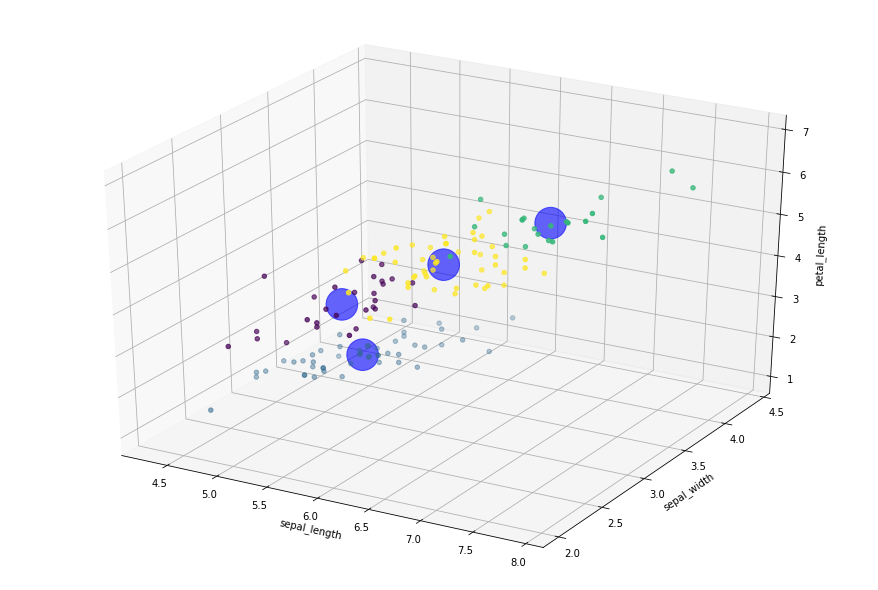

In [20]:
#%matplotlib notebook
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

ax.scatter(df_iris.sepal_length, df_iris.sepal_width, df_iris.petal_length, c=kmeans.labels_)
ax.scatter(centers.sepal_length, centers.sepal_width, centers.petal_length, c='blue', s=1000, alpha=.6)
ax.set(xlabel='sepal_length', ylabel='sepal_width', zlabel='petal_length')

In [21]:
### Figure out how to have access to move the graph around to set it on the best angle for visualization.

#### DBSCAN of Iris dataset:

In [22]:
plt.rc('figure', figsize=(11, 11))

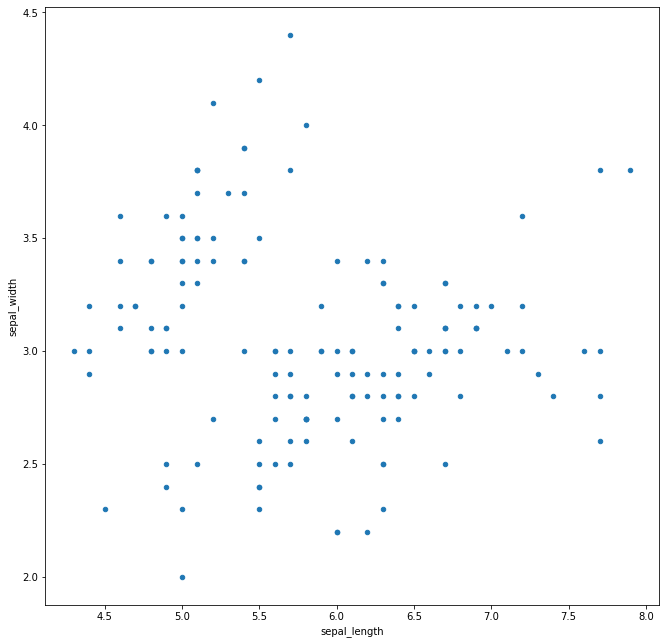

In [23]:
X = df_iris[['sepal_length', 'sepal_width']]
X.plot.scatter(x='sepal_length', y='sepal_width')

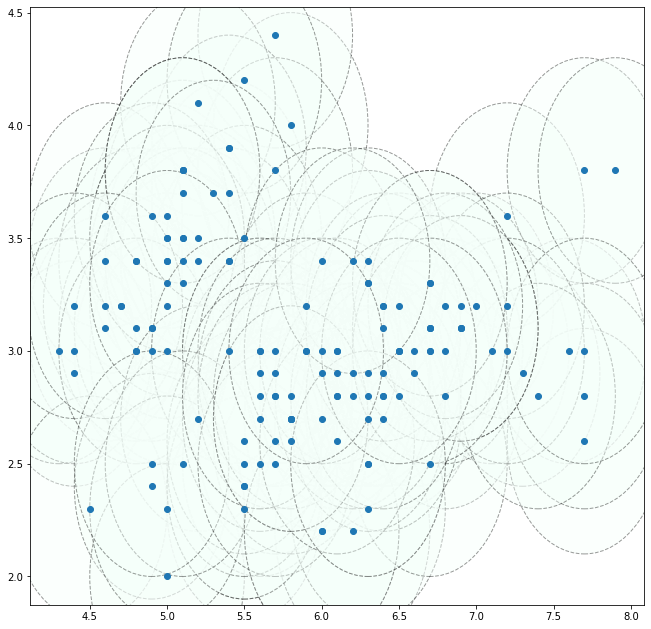

In [24]:
eps = .5

plt.scatter(X.sepal_length, X.sepal_width, zorder=3)
for i, p in X.iterrows():
    circle = plt.Circle((p.sepal_length, p.sepal_width), .5, fc='mintcream', edgecolor='black', ls='--', alpha=.4, zorder=-1)
    plt.gca().add_patch(circle)

In [25]:
eps = .5
minPts = 3

cores, labels = dbscan(x, eps=eps, min_samples=minPts)



### 2. Use the mall dataset.

    - Perform clustering using annual income and spending score. Try out different values for k.
    - Use the resulting clusters to explore your data. What is the center point for each cluster in terms of annual income and spending score? What is the average age for each cluster?
    - Create a 3d plot with annual income, spending score, and age. Use color to distinguish the clusters you have created.

In [26]:
### Load in the mall dataset.

### 3. Load the tips dataset

    - Perform k-means clustering with tip and total_bill. Try a k of 2 and a k of 3. Visualize the resulting clusters.
    - Create a 3d visualization of tip, total bill, and party size. Use color to indicate the clusters you have created.
    - Use the resulting clusters to explore your dataset. What is the average party size for each cluster? How many smokers vs non smokers are in each cluster? Is this different than in the overall population?

In [27]:
# Load in the tips dataset from pydataset. Can also be done from seaborn.

In [28]:
df_tips = data('tips')

In [29]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
# scaler = StandardScaler()
# scaled = scaler.fit_transform(df_tips[['total_bill', 'tip', 'size']])

In [31]:
# xscaled = pd.DataFrame(scale(df_tips[['tip', 'total_bill', 'size']]), columns=['tip', 'total_bill', 'size'])
# xscaled.head()
# x = xscaled[['tip', 'total_bill']]

x = df_tips[['tip', 'total_bill']]

In [32]:
# Create the cluster object and fit it to my x. Then predict. 
# Use k = 2

In [33]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
kmeans.predict(x)

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int32)

In [35]:
# Center points for each cluster.

In [36]:
kmeans.cluster_centers_

array([[ 2.53727273, 15.27886364],
       [ 4.19147059, 31.45132353]])

In [37]:
# This is the same as kmeans.predict(x). Labels each observation into a cluster.

In [38]:
kmeans.labels_

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int32)

In [39]:
# Sum of squared errors from each data point to its associated cluster.

In [40]:
print(kmeans.inertia_)

6760.7222974598935


In [41]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=x.columns)
centers

,tip,total_bill
0,2.537273,15.278864
1,4.191471,31.451324


In [42]:
# Visualize cluster model with 2 clusters.

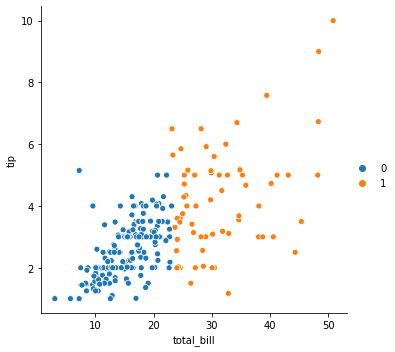

In [43]:
sns.relplot(data=df_tips, hue=kmeans.labels_, x='total_bill', y='tip')

In [44]:
# Create another model where k = 3.

In [45]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
kmeans.predict(x)

array([0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0,
       0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2,
       0, 0], dtype=int32)

In [47]:
# Center point for each cluster.

In [48]:
print(kmeans.cluster_centers_)

[[ 2.35742857 13.81042857]
 [ 4.78464286 38.3725    ]
 [ 3.52065789 23.94578947]]


In [49]:
# labels

In [50]:
kmeans.labels_

array([0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0,
       0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2,
       0, 0], dtype=int32)

In [51]:
# Sum of squared errors

In [52]:
print(kmeans.inertia_)

3569.1309897368424


In [53]:
# Visualize the the cluster model with 3 clusters.

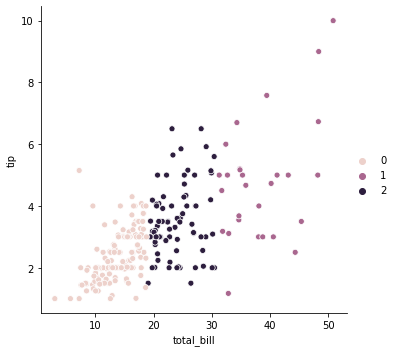

In [54]:
sns.relplot(data=df_tips, hue=kmeans.labels_, x='total_bill', y='tip')

Text(0, 0.5, 'Inertia')

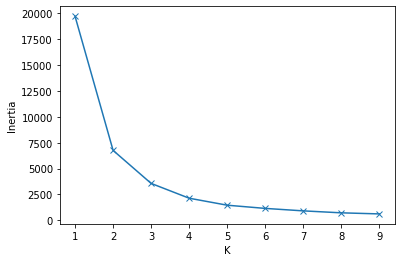

In [60]:
%matplotlib inline

k_values = []
inertias = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(x)
    inertias.append(kmeans.inertia_)
    k_values.append(k)
    
plt.plot(k_values, inertias, marker='x')
plt.xlabel('K')
plt.ylabel('Inertia')

In [56]:
# Create a 3D visualization of the cluster models created along with party size. 
#Use colors to indicate clusters created.

[Text(0.5, 0, 'size'), Text(0.5, 0, 'tip'), Text(0.5, 0, 'total_bill')]

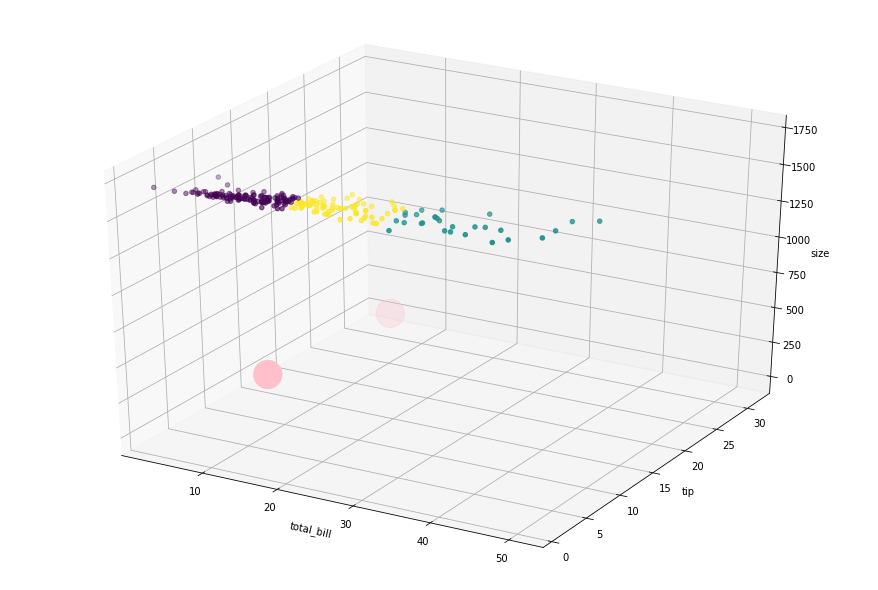

In [57]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

ax.scatter(df_tips.total_bill, df_tips.tip, df_tips.size, c=kmeans.labels_)
ax.scatter(centers.tip, centers.total_bill, c='pink', s=800)
ax.set(xlabel='total_bill', ylabel='tip', zlabel='size')

In [58]:
### fix this with scaled data. turn scaled data into a df 
### fix elbow method graphs